In [1]:
import requests
from PIL import Image
import pytesseract
import cv2  # Change this line
import numpy as np 
from pytesseract import Output


In [16]:
image=Image.open(requests.get('https://i.stack.imgur.com/pbIdS.png',stream=True).raw)
image=image.resize((400,200))
image.save('product1.jpg')

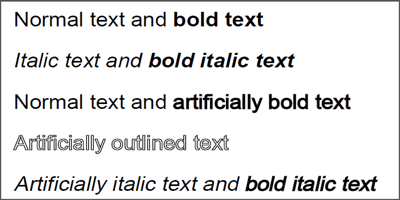

In [17]:
image

In [18]:
#extracting text
custom_config=r'-l eng --oem 3 --psm 6'
extracted_text=pytesseract.image_to_string(image,config=custom_config)
print(extracted_text)

Normal text and bold text

Italic text and bold italic text

Normal text and artificially bold text
Artificially outlined text

Artificially italic text and bold italic text



In [19]:
#removing irrelavant symbols
try:
    extracted_text=pytesseract.image_to_string(image,lang='eng')
    char_to_remove="!()@-*>+-/,'|$#%^~`" 
    new_string=extracted_text 
    for char in char_to_remove:
        new_string = new_string.replace(char,"")
    print(new_string)
except IOError as e:
    print("error (%s)." %e)
    

Normal text and bold text

Italic text and bold italic text

Normal text and artificially bold text
Artificially outlined text

Artificially italic text and bold italic text




In [20]:
image=cv2.imread('product1.jpg')

In [22]:
# image

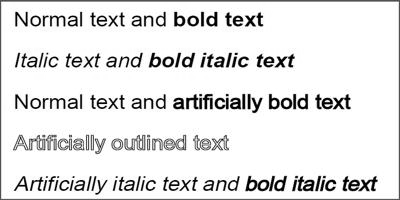

In [23]:
#converting color to grey scale
def get_greyscale(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray=get_greyscale(image)
Image.fromarray(gray)

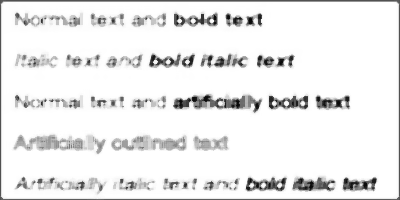

In [29]:
#noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5) #non-linear filtering technique. 
noise=remove_noise(gray)
Image.fromarray(noise)
#bluring the image to remove noise 

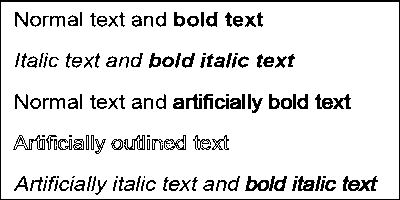

In [30]:
#creating threshold transformation 
def threshold_img(image):
    return cv2.threshold(image,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
thresh=threshold_img(gray)
Image.fromarray(thresh)
#if pixel value is greater than threshold then it is assigned to 1 value->white maybe else black 

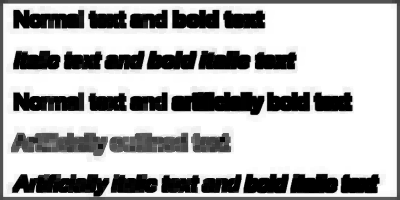

In [33]:
def erode_image(image):
    kernel=np.ones((5,5),np.uint8)
    return cv2.erode(image,kernel,iterations=1)
erode=erode_image(gray)
Image.fromarray(erode)
#The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white).

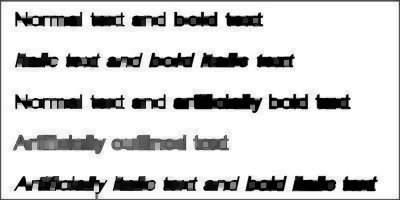

In [34]:
def morphing_image(image):
    kernel=np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image,cv2.MORPH_OPEN,kernel)
morphImage=morphing_image(gray)
Image.fromarray(morphImage)
#We can also utilize morphological operations to close gaps between objects as well as open them.

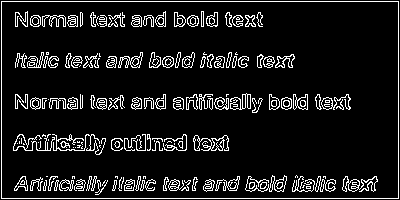

In [35]:
def canny_edge(image):
    return cv2.Canny(image,100,200)
canny=canny_edge(gray)
Image.fromarray(canny)


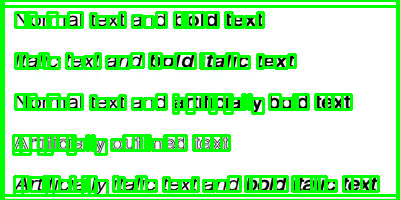

In [62]:
#bounding box around twxt
image=cv2.imread('product1.jpg')
h,w,c=image.shape
boxes=pytesseract.image_to_boxes(image)
for b in boxes.splitlines():
    b=b.split(' ')
    img=cv2.rectangle(image,(int(b[1]),h- int(b[2])),(int(b[3]),h-int(b[4])),(0,255,0),2)
Image.fromarray(img)

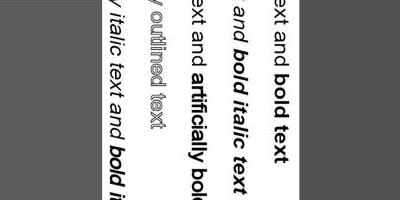

In [63]:
def skew_correction(image):
    coords=np.column_stack(np.where(image>0))
    angle=cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle=-(90+angle)
    else:
        angle=-angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1)
    rotated=cv2.warpAffine(image,M,(w,h),flags=cv2.INTER_CUBIC,borderMode=cv2.BORDER_REPLICATE)
    return rotated 
rotated=skew_correction(gray)
Image.fromarray(rotated)
#Overall, this function is designed to correct the skewness in an image by applying a rotation.  

In [68]:
def match_template(image,template):
    return cv2.matchTemplate(image,template,cv2.TM_CCOEFF_NORMED)
match=match_template(gray,gray)
match #returns similarity score

array([[0.99999887]], dtype=float32)